Assignment about Random variation and power analysis. Link to page [here](https://www.coursera.org/learn/statistical-inferences/supplement/6E39T/assignment-5-2-random-variation-and-power-analysis)

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
sys.path.insert(0, '/home/src')
sys.path

['/home/src',
 '/home/src',
 '/home/notebooks',
 '/usr/local/lib/python37.zip',
 '/usr/local/lib/python3.7',
 '/usr/local/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [101]:
import numpy as np

from simulate_one_group import simulate_one_group
from simulations import simulate_normal

**Variation in single samples**

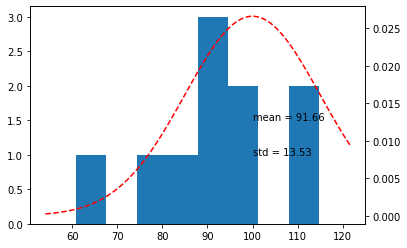

In [89]:
samples, ax = simulate_one_group(number_samples=10)

# Question 1

In [77]:
samples = simulate_normal(100, 15, 10, 10)

In [80]:
samples_means = samples.mean(axis=0)
f"Max difference in means = {samples_means.max() - samples_means.min():.2f}"

'Max difference in means = 10.22'

# Question 2

In [81]:
samples = simulate_normal(100, 2, 10, 10)

In [82]:
samples_means = samples.mean(axis=0)
f"Max difference in means = {samples_means.max() - samples_means.min():.2f}"

'Max difference in means = 1.67'

D) With sd = 2, the variation in means has decreased substantially compared to sd = 15.

# Question 3

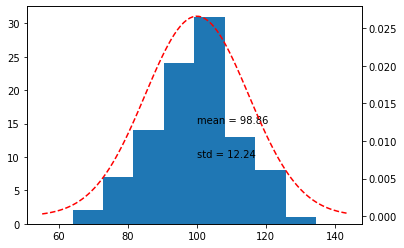

In [93]:
samples, ax = simulate_one_group(number_samples=100)

C) The data always come from a population where IQ scores are normally distributed, but this is very difficult to see, especially when n = 10, but sometimes also when n = 100.

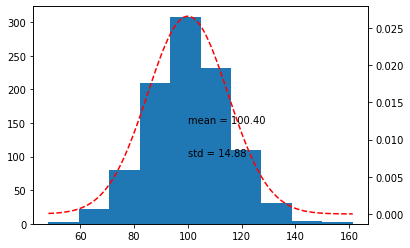

In [94]:
samples, ax = simulate_one_group(number_samples=1000)

**Planning for Accuracy**

In [96]:
# Sample size to estimate mean within 2 pts 95% of the time?
# Need 95% CI to have width 4. Half-width of 95% CI = 1.96 * std / sqrt(N)
(1.96*15/2)**2

216.08999999999997

In [106]:
samples = simulate_normal(100, 15, 216, 1000)
samples_mean = samples.mean(axis=0)

np.mean((samples_mean > 98) & (samples_mean < 102))

0.949

**Variations in p-values, statistical power, and a-priori power analysis**